REMEMBER
- UNCOMMENT OUT THE GRAPHICS PORTIONS 
- DOUBLE CHECK ANSWERS 
- https://scikit-learn.org/stable/modules/neighbors.html

<br><BR>

## Author:  Tom Bresee

### Assignment 1 - SIADS 542

### University of Michigan

<br><br>

In [1]:
version = "v1.6.083120"

<br>

# Assignment 1: Introduction to Supervised Machine Learning

In this first assignment you will be using the [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) dataset to create a classifier that can help diagnose patients. We chose this data not only because it provides a good basis for a kNN classification problem, but also because it illustrates one of the built-in datasets that comes with `scikit-learn`.

In [2]:
# First import some necessary libararies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib

In [4]:

# Specific python library versions: 

print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)


1.17.0
0.25.0
0.9.0
3.1.1


In [5]:


# --- I will add in the specific scikit-learn libraries ---

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# ---------------------------------------------------------



In [6]:

from sklearn.datasets import load_breast_cancer

# Load the dataset from scikit-learn. To see a description of the dataset, uncomment the print statement
cancer = load_breast_cancer()
# print(cancer.DESCR)


<br><br>

## <i><font color='green'>Examining the Dataset:</font></i>

---

* _https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html_
* _Classification dataset_
* _Number of classes:  2_
* _Samples per class: 212(M),357(B)_
* _Samples total (instances): 569_
* _Dimensionality: 30_
* _Features: real, positive_
    
---

In [7]:

print(cancer.DESCR)

# Data Set Characteristics:  Multivariate


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:

# Examining the bunch object methods/possibilities
for m in dir(cancer):
    if not m.startswith("_"):
        print(" ",m)
        

  DESCR
  data
  feature_names
  filename
  frame
  target
  target_names


In [9]:

cancer.data  # raw feature data (thing big-X)
# this is <numpy.ndarray>


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:

cancer.feature_names # column (feature) names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:

print("\nFeature Names in order:")

cnt = 0
    
for c in cancer.feature_names:
    # column (feature) names
   
    print(" ", cnt, "-", c)
    cnt = cnt + 1 
    
print("\n Note:  Col names are listed on left (in pandas form)\n")



Feature Names in order:
  0 - mean radius
  1 - mean texture
  2 - mean perimeter
  3 - mean area
  4 - mean smoothness
  5 - mean compactness
  6 - mean concavity
  7 - mean concave points
  8 - mean symmetry
  9 - mean fractal dimension
  10 - radius error
  11 - texture error
  12 - perimeter error
  13 - area error
  14 - smoothness error
  15 - compactness error
  16 - concavity error
  17 - concave points error
  18 - symmetry error
  19 - fractal dimension error
  20 - worst radius
  21 - worst texture
  22 - worst perimeter
  23 - worst area
  24 - worst smoothness
  25 - worst compactness
  26 - worst concavity
  27 - worst concave points
  28 - worst symmetry
  29 - worst fractal dimension

 Note:  Col names are listed on left (in pandas form)



In [12]:

cancer.filename


'/opt/conda/lib/python3.7/site-packages/sklearn/datasets/data/breast_cancer.csv'

In [13]:

cancer.target # the labels (targets) of the dataset (think y)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:

cancer.target_names  # target names are either M(alignant) or B(enign), i.e. 0,1
#  this is technically a numpy.ndarray. 


array(['malignant', 'benign'], dtype='<U9')

In [15]:

list(cancer.target_names)  # smarter way of listing out the target_names ! 


['malignant', 'benign']

In [16]:

#
# --- Utility Function ---
#  defining a standard bunch object utility function 
#  input:   your bunch object
#  output:  various information about your bunch object 

def examine_my_bunch(bunchO, shape=(299, 299), interpolation='nearest'):
    
    """
    This function returns data about your bunch object.  
    """
    
    print("\n-----------------------------------------------------------")
    print('\nType of object:               {}'.format(type(bunchO)))
    print('\nNumber of samples/instances:  {}'.format(len(bunchO.data)))  
    print('\nNumber of samples/instances:  {}'.format(len(bunchO.feature_names))) 
    print('\nCore data shape (X):          {}'.format(bunchO.data.shape))
    print('\nTarget names:                 {}'.format(bunchO.target_names))
    
    # won't work: 
    # print('\nNumber of unique classes:     {}'.format(bunchO.target.nunique()))

    #print('\nTarget Breakout Count:        {},{}'.format(np.sum(bunchO.target==0, np.sum(bunchO.target==1))))
    
    print("\n-----------------------------------------------------------\n")  


examine_my_bunch(cancer)  #  use utility function 
    


-----------------------------------------------------------

Type of object:               <class 'sklearn.utils.Bunch'>

Number of samples/instances:  569

Number of samples/instances:  30

Core data shape (X):          (569, 30)

Target names:                 ['malignant' 'benign']

-----------------------------------------------------------



In [17]:

# np.sum(cancer.target==0)
# np.sum(cancer.target==1)


The object returned by `load_breast_cancer()` is a scikit-learn `Bunch` object, which is similar to a dictionary.

In [18]:

# We can take a look at what essential attributes it has. Feel free to explore this object yourself. 
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

<br><br>

### Question 0. Warm-up (5 pts)

Understanding how many features you're dealing with and what each feature represents is an essential first step in machine learning.  So, how many features are there in this dataset? Complete the function below to return the answer as an integer. 

In [19]:

def answer_zero():
    
    """
    This function returns the number of features of the breast cancer dataset as an integer. 
    """
    
    # <my code>
    
    # although it is a bunch and you could use this format (.), we choose to use brackets to be safe
    #   return len(cancer.feature_names'])
    
    return len(cancer['feature_names'])

    # cancer.data.shape  =>  (569, 30)
    # 
    # we could have also used:   len(cancer.data.shape[1])  =>  30 
    #
    # its overkill, but could have done a comparison to make sure these two numbers were the same
    # with a == match  (i.e. feature_name count and shape[1] count value

    
    raise NotImplementedError()
    
answer_zero()  # remove this ? 
    

30

In [20]:
# Hidden Tests Below


In [21]:

# use :  df.info() ?
    
# df.isnull().sum()
    

<br>

### Quick Sidebar - SNS Plotting 

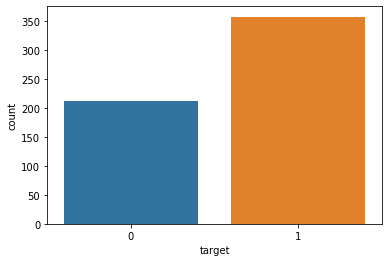

In [22]:

tom = pd.DataFrame(cancer.data, columns = cancer['feature_names'])
tom['target'] = cancer.target 
sns.countplot(tom.target);


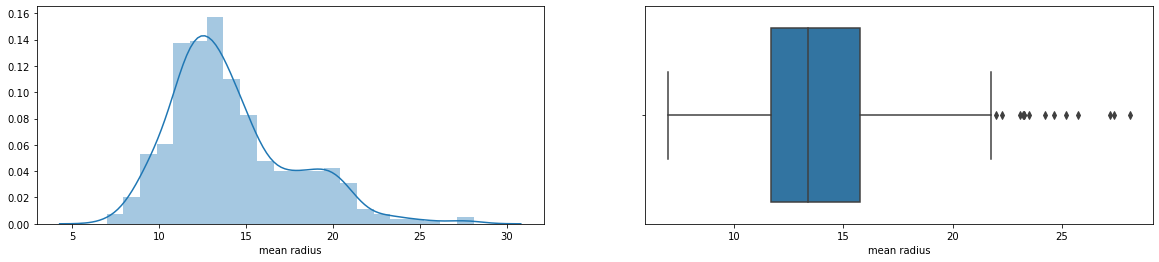

In [23]:

#Univariate analysis

f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(tom['mean radius'])

f.add_subplot(1,2,2)
sns.boxplot(tom['mean radius'])


<br>

<br><br>

### Question 1. Data Transformation (10 pts)

In a lot of cases, raw data may not come in a form that's amenable to further manipulation or interpretation. Therefore, we may need to transform the raw data so that it better fits our purposes. In this assignment, we will store the data in a more human-friendly tabular format as a `pd.DataFrame`.

Complete the function below to return a `pd.DataFrame` of the shape `(569, 31)` with the following columns: 
```
['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']
```

    

In [24]:

def answer_one():
    
    cancer_df = None
    
    #--- my code ---
    
    # we are trying to create a master pandas dataframe that we can later
    # split out into X and y, and the further split to X_test/y_test, etc.
    # if desired, could also create this into a utility function for later 
    #   -  i.e. enter your bunch object, we output X|y for you
        
    cancer_df = pd.DataFrame(cancer.data, columns = cancer['feature_names'])
    #  creating pandas dataframe with input cancer.data, and specific column names (of features)
    
    cancer_df['target'] = cancer.target 
    #  need to create additional column for the target values
    
    # print(cancer_df)
    
    return cancer_df
    # return effectively a X|y matrix 
    
    raise NotImplementedError()
    
# answer_one()
    
# CORRECT


In [25]:
# Autograder tests

stu_ans = answer_one()

assert stu_ans.shape == (569, 31), "Q1: The shape of your dataframe isn't correct. "

assert list(stu_ans.columns) == ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'], "Q1: Please check the column names of your dataframe."

del stu_ans

In [26]:

# as a reference to understand the data, we show first 10 rows here...
dft = answer_one(); display(dft.head(10))


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


<br><br>

### Question 2. Class Distribution (5 pts) 

It's often a good idea to get some descriptive statistics, such as mean and variance of certain features, on the data at hand to understand the big picture. 

In particular, it's always a good idea to ask: what is the class distribution? That is, how many instances belong to the *malignant* class (encoded as 0) and the *benign* class (encoded as 1), respectively? Complete the function below to return the class distribution as a `pd.Series` of length 2 whose index is  `['malignant', 'benign']`

In [27]:
# temp

dft = answer_one()
display(dft.head(10))



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [28]:

cancer.target_names


array(['malignant', 'benign'], dtype='<U9')

In [29]:

def answer_two():

    dist = None
    
    #--- my code ---
    
    # Note: There are many approaches that will work here
    # I will need to create the panda series such that the index are two values (the target_name classes)
    # Each index will be associated with a single value (the number of instances of said class)
    #   -  np.sum(cancer.target==0), np.sum(cancer.target==1)
    #   -  Or choose the very most streamlined way to be pythonic 
    #   -  Generally to count distinct values in single column, u use Series.value_counts
       
    df = answer_one()
    # master dataframe
    
    dist = df.target.value_counts().sort_index() 
    # i personally like adding: .value_counts(ascending=False), but will use .sort_index()     
        
    #  print(dist.index)  =>   Int64Index([1, 0], dtype='int64')
    
    #  cancer.target_names =>  array(['malignant', 'benign'], dtype='<U9')
    
    
    # we will need to change the index values to be our class NAMES 
    # and we will do it the SAFE way, direct equality 
    dist.index = list(cancer.target_names)
    # this way it will work for any future function you use... 
    
    return dist

    # raise NotImplementedError()

answer_two() 



# --- df.target.value_counts() ---
#      1    357
#      0    212
#      Name: target, dtype: int64 
#  * but see how the index isn't in order ?  
  
    
# --- cancer.target_names ---
#       array(['malignant', 'benign'], dtype='<U9')


# --- output type ---
#   <class 'pandas.core.series.Series'>



malignant    212
benign       357
Name: target, dtype: int64

In [30]:
# Autograder tests

stu_ans = answer_two()

assert isinstance(stu_ans, pd.Series), "Q2: Your result should be a pd.Series."


del stu_ans

<br><br>

### Question 3. Data Preparation (5 pts)

Training a classifier is a *supervised* machine learning problem, in which each instance $x_i$ has a corresponding class label $y_i$. All the instances $x_i$'s are collected into a matrix $X$ (with one instance per row of $X$), and all the corresponding labels are put into a column vector $y$. 

Now let's prepare the data for use with `scikit-learn`. Complete the function below to split our DataFrame into `X` (the data) and `y` (the labels), and to return them as a `tuple`, where
* `X` is a `pd.DataFrame` of the shape `(569, 30)`
* `y` is a `pd.Series` of the shape `(569,)`.

In [31]:

def answer_three():
    
    X, y = None, None

    # --- my code ----
    
    df = answer_one()
    # master dataframe
    # display(df)
    
    # print(df.shape)  =>  (569, 31)
    
    X = df.drop(columns='target')
    # (569, 30)
    
    y = df.target  
    # or df['target']
    # technically this is a series, its a single col from the original df 
    # (569,)
            
    return X, y

answer_three()

# do we care if there column headers are labelled in the df ? 


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [32]:
# Autograder tests

stu_ans = answer_three()

assert isinstance(stu_ans, tuple), "Q3: You should return a tuple!"
assert stu_ans[0].shape == (569, 30), "Q3: Please check the shape of X."
assert stu_ans[1].shape == (569,), "Q3: Please check the shape of y."

del stu_ans

<br><br>

### Question 4. Train-test Split (10 pts)

For a typical machine learning problem, we'd need two separate datasets, one for training a model and the other for evaluating the trained model for its generalisability to unseen data. `scikit-learn` provides a very handy [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function for this purpose.  

Now, complete the function below that uses the `train_test_split` function to split `X` and `y` into training and testing sets. Your function should return a `tuple` `(X_train, X_test, y_train, and y_test)` where


* `X_train` is of the shape `(426, 30)`
* `X_test` is of the shape `(143, 30)`
* `y_train` is of the shape `(426,)`
* `y_test` is of the shape `(143,)`

**IMPORTANT: Set the random number generator state to the number 42 by specifying `random_state=42` to ensure a deterministic result that matches that of the autograder.**   Why the number 42?  Please see: https://www.theguardian.com/books/2011/feb/03/douglas-adams-42-hitchhiker

(In later work, we'll actually use a slightly more sophisticated splitting scheme that uses training, validation, and test sets, but we'll cover this later as part of a technique called cross-validation.)

In [33]:

from sklearn.model_selection import train_test_split
# our core sklearn splitting function 


def answer_four():
    
    X_train, X_test, y_train, y_test = (None, ) * 4
    
    # --- my code ---
    
    X, y = answer_three()
    # We will use answer three which broke out our core X and y matrices as starting point
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    #  Break the X and y to their train/test ratios, default should be .75/.25
    #  READ:  you better make sure you use random_state=42 for rest of assignment ! 

    return X_train, X_test, y_train, y_test
    # i always find it interesting that you dont actually have to put () around the tuple output 
    

answer_four()

#  This will return four physical matrices. 
#  If you want the first, just say answer_four()[0], etc. 
#  Math: 
#    - Default sklearn should be 75%/25% ratio 
#    - 



(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 287       12.890         13.12           81.89      515.9          0.06955   
 512       13.400         20.52           88.64      556.7          0.11060   
 402       12.960         18.29           84.18      525.2          0.07351   
 446       17.750         28.03          117.30      981.6          0.09997   
 210       20.580         22.14          134.70     1290.0          0.09090   
 ..           ...           ...             ...        ...              ...   
 71         8.888         14.64           58.79      244.0          0.09783   
 106       11.640         18.33           75.17      412.5          0.11420   
 270       14.290         16.82           90.30      632.6          0.06429   
 435       13.980         19.62           91.12      599.5          0.10600   
 102       12.180         20.52           77.22      458.7          0.08013   
 
      mean compactness  mean concavity  mean conca

In [34]:

mathcheck = answer_four()

print("\nQuick math check:")
print("You should have a calculated ratio of .75 !")

print("Your calculated ratio is: ", round(mathcheck[0].shape[0] / 569, 2), "\n")
# Is the X_test 75% of the total (569 entries) ? 



Quick math check:
You should have a calculated ratio of .75 !
Your calculated ratio is:  0.75 



In [35]:
# Autograder tests

stu_ans = answer_four()

assert stu_ans[0].shape == (426, 30), "Q4: Please check the shape of X_train."
assert stu_ans[1].shape == (143, 30), "Q4: Please check the shape of X_test."
assert stu_ans[2].shape == (426,), "Q4: Please check the shape of y_train."
assert stu_ans[3].shape == (143,), "Q4: Please check the shape of y_test."

del stu_ans

<br><br>

### Question 5. kNN Classifier Construction (5 pts)

Use `KNeighborsClassifier` from `scikit-learn` to fit a $k$-Nearest Neighbours ($k$NN) classifier with `X_train` and `y_train` where $k = 1$. Your function should return the trained classifier itself, which is a `sklearn.neighbors.KNeighborsClassifier` object.

###  <i><font color='green'>Quick sidebar:</font></i>

In [36]:


from sklearn.neighbors import KNeighborsClassifier
# KNN library 

X_train, X_test, y_train, y_test = answer_four()

temp_knn = KNeighborsClassifier(n_neighbors=3)

temp_knn.fit(X_train, y_train)


# if you were smart, you would creat a utility function here...
#

# ----------------------------
# Methods available:
#
# for m in dir(temp_knn):
#     if not m.startswith("_"):
#         print(m)
# 
#   algorithm
#   classes_
#   effective_metric_
#   effective_metric_params_
#   fit
#   get_params
#   kneighbors
#   kneighbors_graph
#   leaf_size
#   metric
#   metric_params
#   n_features_in_
#   n_jobs
#   n_neighbors
#   n_samples_fit_
#   outputs_2d_
#   p
#   predict
#   predict_proba
#   radius
#   score
#   set_params
#   weights
# ----------------------------



# ----------------------------
#type(temp_knn)  =>  sklearn.neighbors._classification.KNeighborsClassifier

# neighbor count defaults to: 5 (if you don't specify) 

# https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm

# temp_knn.weights   =>   'uniform'  (i.e. All points in each neighborhood are weighted equally.)
# or i could have used 'distance' for inverse
#  

# temp_knn.algorithm  =>  'auto'

# temp_knn.metric  =>  'minkowski'

# ----------------------------



# --- temp_knn.get_params() -

# {'algorithm': 'auto',
#  'leaf_size': 30,
#  'metric': 'minkowski',
#  'metric_params': None,
#  'n_jobs': None,
#  'n_neighbors': 5,
#  'p': 2,
#  'weights': 'uniform'}




# --- underscore 'created' values ---
#
#  temp_knn.classes_  =>  array([0, 1])   i.e. two values... binary classifer problem... 
#  
#  temp_knn.n_features_in_  =>  30
#
#  temp_knn.outputs_2d_  =>  False
# 
#  add more...



KNeighborsClassifier(n_neighbors=3)

```  

# configuration parameters 


n_neighborsint, default=5
  Number of neighbors to use by default for kneighbors queries.

weights{‘uniform’, ‘distance’} or callable, default=’uniform’
  weight function used in prediction. Possible values:

 ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

 ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

 [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

    
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.

    
    
leaf_sizeint, default=30
  Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.



pint, default=2
  Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

    
metricstr or callable, default=’minkowski’
  the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of DistanceMetric for a list of available metrics. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.

    
metric_paramsdict, default=None
  Additional keyword arguments for the metric function.

n_jobsint, default=None
  The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.

```

In [37]:

#  To calculate distances, 3 distance metrics that are often used are Euclidean Distance,
#  Manhattan Distance, and Minkowski Distance.

#  When you use Scikit-Learn, the default distance used is Euclidean. It can be seen in the 
# Minkowski distance formula that there is a Hyperparameter p, if set p = 1 then it will use
# the Manhattan distance and p = 2 to be Euclidean.


In [38]:
# --- end sidebar ----

<br><br>

In [39]:

from sklearn.neighbors import KNeighborsClassifier
# KNN library 

def answer_five():
    
    knn = None
    
    # --- my code ---
    
    X_train, X_test, y_train, y_test = answer_four()
    # my split out data matrices of X and y 
    # 42 was the base fyi random state... so keep using answer_four() as input ! 
       
    
    knn = KNeighborsClassifier(n_neighbors=1)
    # 
    # initiate (create) a KNN neighbors classifier object, assuming number of neighbors == 1 
    # 
    # type(knn)  = >  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
    
    
    knn.fit(X_train, y_train)
    # Fit the model using X_train as training data and y_train as target values
    # FYI, i could have chained both steps at the same time 
    
    return knn

answer_five()



KNeighborsClassifier(n_neighbors=1)

In [40]:
# Autograder tests

stu_ans = answer_five()
assert isinstance(stu_ans, KNeighborsClassifier), "Q5: Please build the required kNN classifier."
assert len(stu_ans.classes_) == 2, "Q5: Your kNN classifier was trained with an incorrect # classes. "
del stu_ans

<br><br>

### Question 6. kNN Prediction on Mean Vector (10 pts)

It's often useful and interesting to know what class a "typical" or "average" data point belongs to. Use your kNN classifier from the last question to predict the class label for the *mean vector* of the training data. Your function should return the predicted class label as a singleton numpy array --- either `array([ 0.])` or `array([ 1.])`. 

If you encounter errors complaining that the shape of your data isn't correct, carefully check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) of the `predict` function. Another useful hint is to consider what kind of object `X_train` is. How do you make sure it is in the correct shape?

In [41]:

def answer_six():
    
    pred = None

    # --- my code here ---
    
    df = answer_one()
    
    means = df.mean()[:-1].values.reshape(1, -1)
    #  Key:  the .reshape(1,-1) command does the following:
    #  
    #    print(type(means))      ==   <class 'numpy.ndarray'>
    
    knn = answer_five()
    
    pred = knn.predict(means)
    
    return pred

answer_six()


# could be wrong, may either need to e array[1.]  OR  array[0.]
# Assume:  array([1]) is correct (how prove ?)



array([1])

In [42]:
# Autograder tests

stu_ans = answer_six()

assert isinstance(stu_ans, np.ndarray), "Q6: Your function should return a np.ndarray. "

del stu_ans

<br><br>

### Question 7. kNN Prediction on the Test Set (5 pts)

Now, use your kNN classifier to predict class labels for the test set `X_test`. Your function should return a binary `np.ndarray` of the shape `(143,)` whose values are either `0.0` or `1.0`

In [43]:

def answer_seven():
    
    preds = None
    
    # --- my code ---
    
    X_train, X_test, y_train, y_test = answer_four()
    # note that X_test is 25% of the total, i.e. 143 entries
    
    knn = answer_five()
    
    preds = knn.predict(X_test)
    # I am 
    
    #     print(y_test)
    #     print(knn.predict(X_test).shape)
    
    return preds


# --- temp ---

#  temp = answer_seven()

#  temp.shape  =>   (143,) 

#  type(temp)  =>   numpy.ndarray

#  print(temp)

#  array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
#         0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
#         1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
#         0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
#         1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
#         0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
#         0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

#   len(temp)  =>  143 




In [44]:
# Autograder tests

stu_ans = answer_seven()
assert isinstance(stu_ans, np.ndarray), "Q7: Your function should return a np.ndarray. "

del stu_ans

<br><br>

### Question 8. Evaluation on the Test Set (5 pts) 

Once you have the predictions on the test set, you may compare them with the ground-truth labels to gauge how well your model performs when given unseen data. 

Complete the function below to compute the score (mean accuracy) of your kNN classifier using the test set `X_test` and the test labels `y_test`. The function should return a `float` between 0 and 1.

In [45]:

def answer_eight():
    
    score = None
    
    # ---  my code here ---
    
    X_train, X_test, y_train, y_test = answer_four()
    
    knn = answer_five()
   
    score = knn.score(X_test, y_test)
    # i input the X_test and y_test, and it compares what it predicted vs reality, and then
    # outputs a raw ratio score, very simple...
    # I could round it if i wanted... 
      
    return score

answer_eight()


# final answer:  0.9300699300699301 (not bad) 


0.9300699300699301

In [46]:
# Autograder tests

stu_ans = answer_eight()

assert isinstance(stu_ans, float), "Q8: Your function should return a float. "

del stu_ans

<br><br>

### Optional plot

Note: The following plots will help you to evaluate the model with showing the prediction accuracy in training and testing set.

Try using the plotting function below to visualize the different predicition scores between training and test sets, as well as malignant and benign cells.

In [47]:
def accuracy_plot(knn):
#     import matplotlib.pyplot as plt

#     %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<br>

Uncomment the below line to see the visualization. You can pass in any trained classifier as an argument.

**Comment out** the the below line when submitting your notebook for grading. 

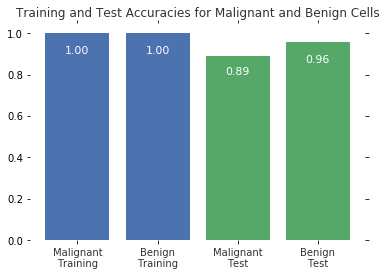

In [48]:
#Remember to comment it out when submitting the notebook
accuracy_plot(answer_five())

<br><br>

### Question 9. Hyper-parameter Tuning (5 pts)

It's common to experiment with different configurations of a model, also known as "hyper-parameters" which are typically specified in advance of starting the step of estimating the learnable "parameters" of a specific model configuration in order to achieve better performance. The main crucial hyper-parameter of a k-NN model is the number $k$, the number of neighbors to examine. 

Change $k$ to 15 and fit the model with training data. Complete the function below to return the trained model, which is a `sklearn.neighbors.KNeighborsClassifier` object. Compare this with the results above for $k$ = 1.

In [49]:

from sklearn.neighbors import KNeighborsClassifier
# KNN library


def answer_nine():
    
    knn = None
    
    # --- my code here ---
    
    X_train, X_test, y_train, y_test = answer_four()
    
    knn = KNeighborsClassifier(n_neighbors=15)
    
    knn.fit(X_train, y_train)
    
    return knn

answer_nine()


KNeighborsClassifier(n_neighbors=15)

In [50]:

# how am i supposed to 'compare' the two instances ?  add something technical here ! 

#  -  


In [51]:
# Autograder tests

stu_ans = answer_nine()
assert isinstance(stu_ans, KNeighborsClassifier), "Q9: Please build the required kNN classifier."
assert len(stu_ans.classes_) == 2, "Q9: Your kNN classifier was trained with an incorrect # classes. "
del stu_ans

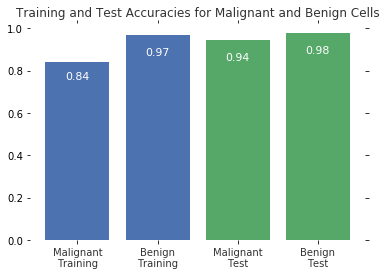

In [52]:
# Remember to comment it out when submitting the notebook
accuracy_plot(answer_nine())

<br><br>

### Question 10. Weighted k-NN (5 pts)

Keeping $k = 15$, now change the k-NN method to use a *weighted* distance measure: this means closer neighbors of a query point will have more influence on the prediction than neighbors which are a greater distance away. (Normally, the default k-NN classifier uses a uniform weighting, i.e. it ignores how far a neighbor is and just sees that it exists.)

Your function below should return a trained kNN classifier of the type `sklearn.neighbors.KNeighborsClassifier`. (You may find it helpful to plot and compare the results with the unweighted distance measure, using the provided plotting function.)

In [53]:

from sklearn.neighbors import KNeighborsClassifier
# KNN library

def answer_ten():
    
    knn = None
    
    # --- my code here ---
    
    X_train, X_test, y_train, y_test = answer_four()
    
    knn = KNeighborsClassifier(n_neighbors=15, weights = 'distance' )
    
    knn.fit(X_train, y_train)
    
    return knn

answer_ten()


# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
# from sklearn import metrics
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



# when you do differently than the defaults, you will see each manner that was changed in output


KNeighborsClassifier(n_neighbors=15, weights='distance')

In [54]:
# Autograder tests

stu_ans = answer_ten()
assert isinstance(stu_ans, KNeighborsClassifier), "Q9: Please build the required kNN classifier."
assert len(stu_ans.classes_) == 2, "Q9: Your kNN classifier was trained with an incorrect # classes. "
del stu_ans

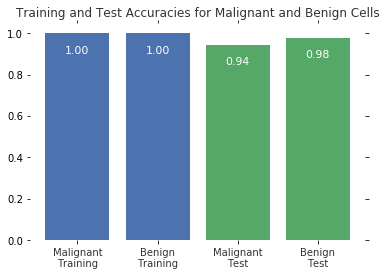

In [55]:
# Remember to comment it out when submitting the notebook
accuracy_plot(answer_ten())

<br><br>

### Question 11: Model parameter tuning (15 points)

It is important to improve algorithm design through automatically changing the parameter based on data-driven evidence, because it is more effective than just 'trying out' different parameters by hand.

Perform a simple parameter sweep for all **odd** values of $k$ from 1 to 19 inclusive, and return the optimal value of $k$ that leads to the highest overall *test set accuracy* on this train/test split.  Accuracy is computed using the **score** method. Your code should return an integer between 1 and 19. In case of a tie, return the smallest best $k$.

In [56]:

# there are two key ways to actually do this...
#   1.  dictionary and then at the end grab the highest score
#   2.  real time threshold keeper

k_to_score_mapper = {}

def answer_eleven():

    k_best = None

    # --- my code here ---
    
    X_train, X_test, y_train, y_test = answer_four()
    
    k_sweep = [num for num in range(20) if num % 2 == 1] 
    #  this will be:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

    for kval in k_sweep:
        
        knnclf = KNeighborsClassifier(n_neighbors=kval)
        # we create an instance of Neighbours Classifier and fit the data
        
        knnclf.fit(X_train, y_train)
        
        test_score = knnclf.score(X_test, y_test)
        
        train_score = knnclf.score(X_train, y_train)
        
        k_to_score_mapper[kval] = test_score
        

        
        #print("K-value:", kval, "\t", "Test Score:", train_score)
        
        #
        # --- OUTPUT OF TRAINING SET --- 
        # 
        # output of print statement: 
        # K-value: 1 	 Training Score: 1.0
        # K-value: 3 	 Training Score: 0.9507042253521126
        # K-value: 5 	 Training Score: 0.9342723004694836
        # K-value: 7 	 Training Score: 0.9366197183098591
        # K-value: 9 	 Training Score: 0.9342723004694836
        # K-value: 11 	 Training Score: 0.9342723004694836
        # K-value: 13 	 Training Score: 0.9248826291079812
        # K-value: 15 	 Training Score: 0.9225352112676056
        # K-value: 17 	 Training Score: 0.9248826291079812
        # K-value: 19 	 Training Score: 0.92018779342723
        #
        #
        # 
        # print("K-value:", kval, "\t", "Test Score:", test_score)
        # --- OUTPUT OF THE TEST SET --- 
        #
        # K-value: 1 	 Test Score: 0.9300699300699301
        # K-value: 3 	 Test Score: 0.9300699300699301
        # K-value: 5 	 Test Score: 0.965034965034965
        # K-value: 7 	 Test Score: 0.958041958041958
        # K-value: 9 	 Test Score: 0.958041958041958
        # K-value: 11 	 Test Score: 0.9790209790209791 *
        # K-value: 13 	 Test Score: 0.972027972027972
        # K-value: 15 	 Test Score: 0.965034965034965
        # K-value: 17 	 Test Score: 0.965034965034965
        # K-value: 19 	 Test Score: 0.965034965034965
        # 
                
        
    # print(k_to_score_mapper)
    # dict: 
    #  {1: 0.9300699300699301, 3: 0.9300699300699301, 5: 0.965034965034965, 7: 0.958041958041958,
    #   9: 0.958041958041958, 11: 0.9790209790209791, 13: 0.972027972027972, 
    #  15: 0.965034965034965, 17: 0.965034965034965, 19: 0.965034965034965}
          
    k_best = max(k_to_score_mapper, key=lambda kval: k_to_score_mapper[kval])
    
    return k_best
    
answer_eleven()


# Comparing: 
#
# use these in the loop:
#    print("K-value:", kval, "\t", "Test Score:", test_score)
#    print("K-value:", kval, "\t", "Train Score:", train_score)
#
# --- output --- 
#
# K-value: 1 	 Test Score: 0.9300699300699301
# K-value: 1 	 Train Score: 1.0
# K-value: 3 	 Test Score: 0.9300699300699301
# K-value: 3 	 Train Score: 0.9507042253521126
# K-value: 5 	 Test Score: 0.965034965034965
# K-value: 5 	 Train Score: 0.9342723004694836
# K-value: 7 	 Test Score: 0.958041958041958
# K-value: 7 	 Train Score: 0.9366197183098591
# K-value: 9 	 Test Score: 0.958041958041958
# K-value: 9 	 Train Score: 0.9342723004694836
# K-value: 11 	 Test Score: 0.9790209790209791
# K-value: 11 	 Train Score: 0.9342723004694836
# K-value: 13 	 Test Score: 0.972027972027972
# K-value: 13 	 Train Score: 0.9248826291079812
# K-value: 15 	 Test Score: 0.965034965034965
# K-value: 15 	 Train Score: 0.9225352112676056
# K-value: 17 	 Test Score: 0.965034965034965
# K-value: 17 	 Train Score: 0.9248826291079812
# K-value: 19 	 Test Score: 0.965034965034965
# K-value: 19 	 Train Score: 0.92018779342723


# or if easier to see: 
#
# K-value: 1 	     Test Score: 0.9300699300699301
# K-value: 3 	     Test Score: 0.9300699300699301
# K-value: 5 	     Test Score: 0.965034965034965
# K-value: 7 	     Test Score: 0.958041958041958
# K-value: 9 	     Test Score: 0.958041958041958
# K-value: 11        Test Score: 0.9790209790209791 * 
# K-value: 13        Test Score: 0.972027972027972
# K-value: 15        Test Score: 0.965034965034965
# K-value: 17        Test Score: 0.965034965034965
# K-value: 19        Test Score: 0.965034965034965
# 
# K-value: 1 	     Training Score: 1.0 * 
# K-value: 3 	     Training Score: 0.9507042253521126
# K-value: 5 	     Training Score: 0.9342723004694836
# K-value: 7 	     Training Score: 0.9366197183098591
# K-value: 9 	     Training Score: 0.9342723004694836
# K-value: 11 	     Training Score: 0.9342723004694836
# K-value: 13 	     Training Score: 0.9248826291079812
# K-value: 15 	     Training Score: 0.9225352112676056
# K-value: 17 	     Training Score: 0.9248826291079812
# K-value: 19 	     Training Score: 0.92018779342723
        
        

11

In [57]:
# Autograder tests

stu_ans = answer_eleven()

assert isinstance(stu_ans, int), "Q11: Your function should return an integer. "

del stu_ans

<br><br>

### Question 12: Overfitting  (15 points)

A key sign of overfitting is obtaining a training set accuracy that is extremely high (or even perfect), but a test set accuracy that is considerably lower. It is tempting to use a classifier that does so well on the training data it was given, but reality sets in when we try to use this overfit classifier on new test data and we discover it does not in fact generalize well.

Using the same set of possible k-NN classifiers and values of $k$ as the previous question (Q11), look for a scenario where overfitting is likely to be happening, by finding the optimal value for $k$ if your goal was to pick the classifier that did best only on the **training set**.  Compute what the resulting test set accuracy would have been, if you had picked that training-set-based value for $k$.

Your function should return an (`int`, `float`, `float`) tuple, as follows:

`tuple[0]`: the optimal value of $k$ that maximizes *training set* accuracy

`tuple[1]`: the corresponding *training set* accuracy for that optimal $k$

`tuple[2]`: the corresponding *test set* accuracy that you would have received *if* you had used that optimal $k$.

(It is instructive to compare this test set accuracy with the best one you were able to achieve in question 11.)

In [63]:

k_to_training_score_mapper = {}

k_to_test_score_mapper     = {}


def answer_twelve():
    
    k_best = None

    # --- my code here ---
    
    X_train, X_test, y_train, y_test = answer_four()
    
    k_sweep = [num for num in range(20) if num % 2 == 1] 
    #  this will be:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

    for kval in k_sweep:
        
        knnclf = KNeighborsClassifier(n_neighbors=kval)
        # we create an instance of Neighbours Classifier and fit the data
        
        knnclf.fit(X_train, y_train)
        
        test_score = knnclf.score(X_test, y_test)
        
        train_score = knnclf.score(X_train, y_train)
        
        k_to_training_score_mapper[kval] = train_score
        
        k_to_test_score_mapper[kval] = test_score
        
    
    
    # print(k_to_score_mapper)
    # dict: 
    #  {1: 1.0, 3: 0.9507042253521126, 5: 0.9342723004694836, 7: 0.9366197183098591, 
    #  9: 0.9342723004694836, 11: 0.9342723004694836, 13: 0.9248826291079812, 
    #  15: 0.9225352112676056, 17: 0.9248826291079812, 19: 0.92018779342723}
        
    
    #  1. use numbers, it helps 
    k_best = max(k_to_training_score_mapper, key=lambda kval: k_to_training_score_mapper[kval])
    # this is the k for the highest training score value 
    
    #  2. 
    highest_training_score_for_k_best = max(k_to_training_score_mapper, key=k_to_training_score_mapper.get)
    
    #  3. 
    test_score_for_k_best = k_to_test_score_mapper[k_best]
    
    
    # the k value for the best accuracy (training, not test set)
    
    # python ok way to find max value in dictionary: 
    #    all_values = a_dictionary.values()
    #    max_value = max(all_values)

    return (k_best, float(highest_training_score_for_k_best), test_score_for_k_best) 
    #  tuple[0]: the optimal value of  𝑘  that maximizes training set accuracy (in my case 1)
    #  tuple[1]: the corresponding training set accuracy for that optimal 𝑘  (in my case 1.0)
    #  tuple[2]: the corresponding test set accuracy that you would have received if you had used that optimal 𝑘 .
    
    
answer_twelve()


# this answer makes sense
#   - the most overfit would probably be k=1, very tight and complex
#   - it also results in a perfect score (training), due to probably memorization 



(1, 1.0, 0.9300699300699301)

In [64]:
# Autograder tests

stu_ans = answer_twelve()

assert isinstance(stu_ans, tuple), "Q12: Your function should return a tuple. "
assert len(stu_ans) == 3, "Q12: The length of your returned tuple should be 3. "
assert isinstance(stu_ans[0], int), "Q12: Your tuple format should be (*int*, float, float). "
assert isinstance(stu_ans[1], float), "Q12: Your tuple format should be (int, *float*, float). "
assert isinstance(stu_ans[1], float), "Q12: Your tuple format should be (int, float, *float*). "


del stu_ans

<br><br><br>

In [62]:


# from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
# ... KNeighborsClassifier)



In [ ]:

#  ADD IN A DIRECT PREDICTION 
#Predict Output
# predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
# print(predicted)



In [ ]:

# test_size=0.3
# X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test
